## Decision Trees, Decision Boundaries, and Evaluation

### Definition:   
 A decision tree is a predictive modeling tool that is used to create a visual representation of all possible outcomes of a decision. It is a hierarchical model that consists of a set of nodes and branches, where each node represents a decision or test and each branch represents the outcome of that decision or test. Decision trees are commonly used in machine learning, data mining, and business intelligence to help with decision-making, classification, and prediction tasks.    

![Alt text](tree_example.png)  
 
 Once the decision tree is constructed, it can be used to make predictions for new data by traversing the tree from the root node down to a leaf node, where the prediction is based on the majority class or average value of the training examples in that leaf. Decision trees have several advantages, such as being interpretable, robust to outliers, and able to handle both categorical and numerical data. However, they can also be prone to overfitting, bias, and instability, and require careful tuning of their parameters and pruning techniques to avoid these issues. 
 
#### Advantages:

1.  Easy in interpretation
2.  Less data preparation
3.  Non-parametric and non-linearity. There are no significant assumptions to be fulfilled. 
4.  Highly versatile, could perform multiple roles apart from the standard predictions.

#### Disadvantages:

1.  Overfitting problem appears. 
2.  Highly time-consuming in training. 
3.  Does not consider how the recent decision affect next few stages 

### Classification: 

##### Algorithm 
The core algorithm for building decision trees called ID3 by J. R. Quinlan which employs a top-down, greedy search through the space of possible branches with no backtracking. ID3 uses Entropy and Information Gain to construct a decision tree. In ZeroR model there is no predictor, in OneR model we try to find the single best predictor, naive Bayesian includes all predictors using Bayes' rule and the independence assumptions between predictors but decision tree includes all predictors with the dependence assumptions between predictors.   		
 
##### Entropy  
A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous). ID3 algorithm uses entropy to calculate the homogeneity of a sample. If the sample is completely homogeneous the entropy is zero and if the sample is an equally divided it has entropy of one.    
Entropy of one attribute = $\sum_{i =1}^c - p_ilog_2(p_i)$    
Entropy of two attribute = $\sum_{c =x} - P(c)E(c)$   
  
##### Gini
Gini Index is a powerful measure of the randomness or the impurity or entropy in the values of a dataset. Gini Index aims to decrease the impurities from the root nodes (at the top of decision tree) to the leaf nodes (vertical branches down the decision tree) of a decision tree model.    
Gini = $1-\sum_{i =1}^c p_i^2$


### Task
In this notebook we use the decision tree algorithm for breast cancer dataset on wheter the individuals from the test dataset has cancer to be malignant or benign. 
The main importent variables in the datasets are:  
1. ID number
2. Diagnosis (M = malignant, B = benign)
3-32)  
Ten real-valued features are computed for each cell nucleus:  
1.  radius (mean of distances from center to points on the perimeter)  
2. texture (standard deviation of gray-scale values)   
3. perimeter   
4. area  
5. smoothness (local variation in radius lengths)  
6. compactness (perimeter^2 / area - 1.0)  
7. concavity (severity of concave portions of the contour)  
8. concave points (number of concave portions of the contour)  
9. symmetry  
 10.  fractal dimension ("coastline approximation" - 1) 


In [183]:
import numpy as np
import pandas as pd
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
# Loading the data
cancer = pd.read_csv('/Users/weitaoran/Desktop/rice/inde577/INDE577/supervised-learning/Decision-Tress/data.csv')
cancer['diagnosis'] = cancer['diagnosis'].map({'M':1,'B':0})

# Showing overview of the train dataset
cancer.head(6)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


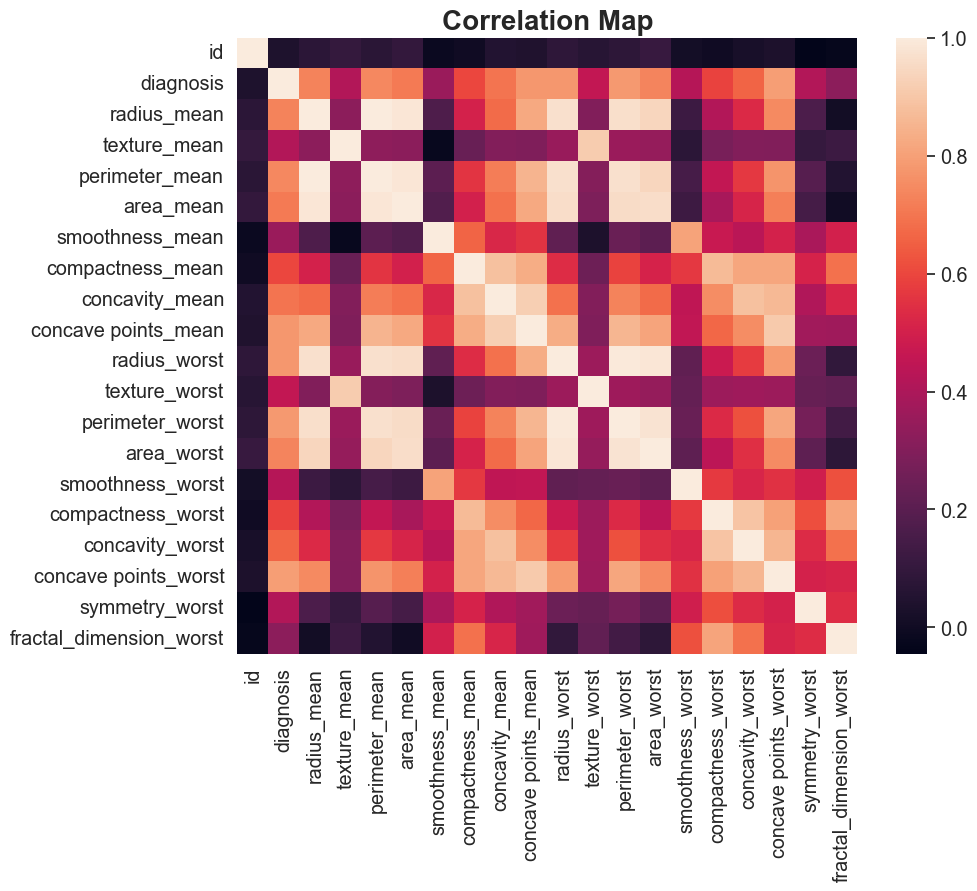

In [185]:
# generally view the dataset
corr_train = cancer.corr()
fig, axs = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_train).set_title("Correlation Map",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
plt.show()

We would only use radius_mean,texture_mean,area_mean and perimeter_mean to evaluate cancer's situation to be malignant or not. 


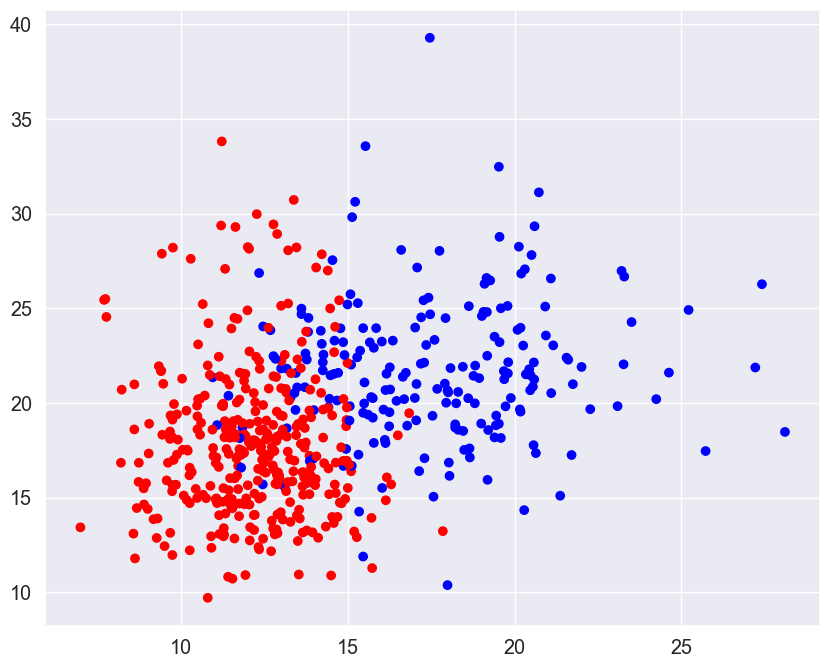

In [186]:
cols = ['radius_mean', "texture_mean","diagnosis"]
cancer_selected = cancer[cols]
X_col = ['radius_mean', "texture_mean"]
X = pd.DataFrame(cancer_selected[X_col])

y = cancer_selected["diagnosis"]

colors = ["red" if Outcome == 0 else "blue" for Outcome in y]
plt.figure(figsize = (10,8))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = colors)


Splite the train and set dataset with ratio of 7:3

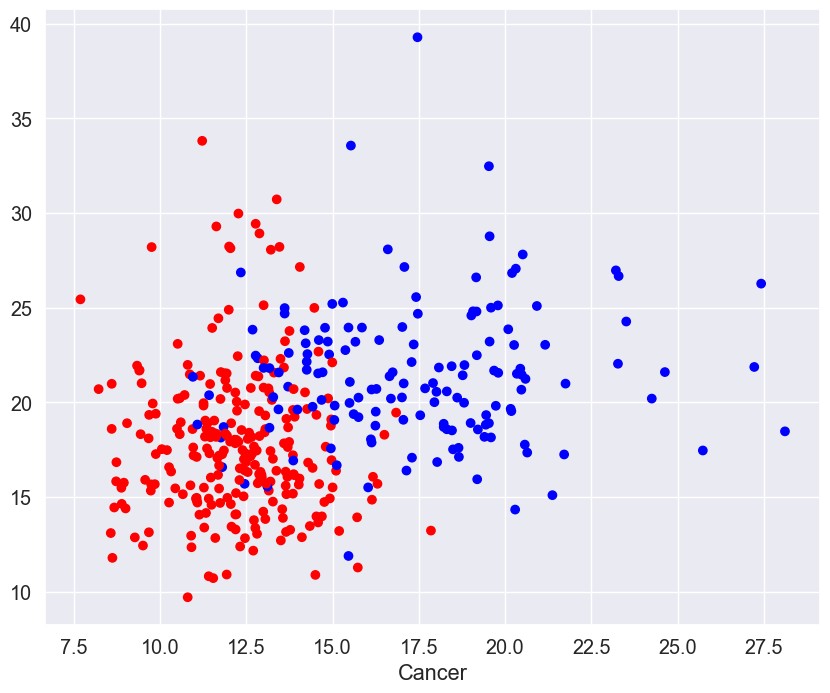

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 42)
c_train = ["red" if Outcome == 0 else "blue" for Outcome in y_train]
c_test = ["red" if Outcome == 0 else "blue" for Outcome in y_test]
plt.figure(figsize = (10,8))
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1], c = c_train)
plt.xlabel("Cancer")
plt.show()

Glance at detailed feature correlation: 

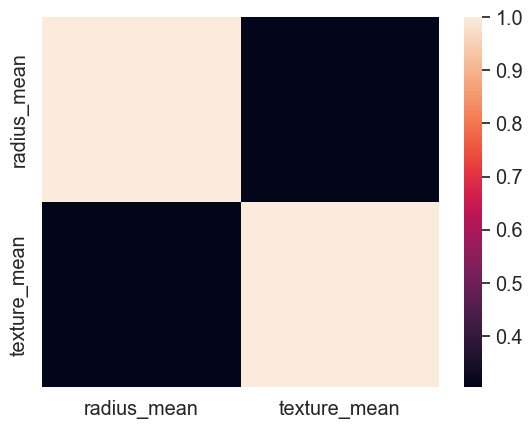

In [190]:

g = sns.heatmap(X_train.corr(),annot=False)

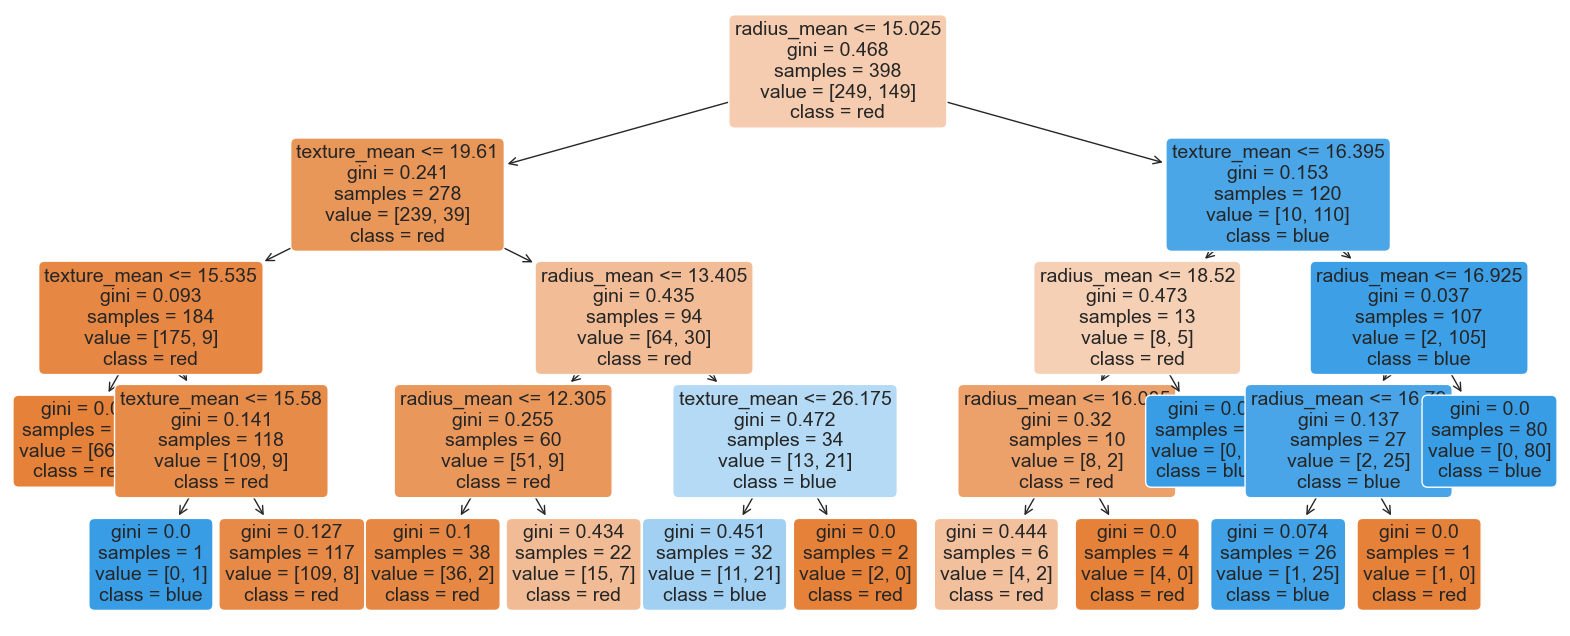

In [199]:
features = ['radius_mean', "texture_mean"]
labels = ['red','blue']

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth = 4, random_state = 42)
decision_tree.fit(X_train, y_train)
     

from sklearn import tree

plt.figure (figsize =(20,8))
a = tree.plot_tree (decision_tree,
              feature_names = features,
              class_names = labels,
              rounded = True,
              filled = True,
              fontsize =14)
plt.show ()

In [200]:
from sklearn.tree import export_text

tree_rules = export_text (decision_tree, feature_names =features)
print (tree_rules)

|--- radius_mean <= 15.03
|   |--- texture_mean <= 19.61
|   |   |--- texture_mean <= 15.54
|   |   |   |--- class: 0
|   |   |--- texture_mean >  15.54
|   |   |   |--- texture_mean <= 15.58
|   |   |   |   |--- class: 1
|   |   |   |--- texture_mean >  15.58
|   |   |   |   |--- class: 0
|   |--- texture_mean >  19.61
|   |   |--- radius_mean <= 13.41
|   |   |   |--- radius_mean <= 12.31
|   |   |   |   |--- class: 0
|   |   |   |--- radius_mean >  12.31
|   |   |   |   |--- class: 0
|   |   |--- radius_mean >  13.41
|   |   |   |--- texture_mean <= 26.18
|   |   |   |   |--- class: 1
|   |   |   |--- texture_mean >  26.18
|   |   |   |   |--- class: 0
|--- radius_mean >  15.03
|   |--- texture_mean <= 16.39
|   |   |--- radius_mean <= 18.52
|   |   |   |--- radius_mean <= 16.09
|   |   |   |   |--- class: 0
|   |   |   |--- radius_mean >  16.09
|   |   |   |   |--- class: 0
|   |   |--- radius_mean >  18.52
|   |   |   |--- class: 1
|   |--- texture_mean >  16.39
|   |   |--- radiu

/Users/weitaoran/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


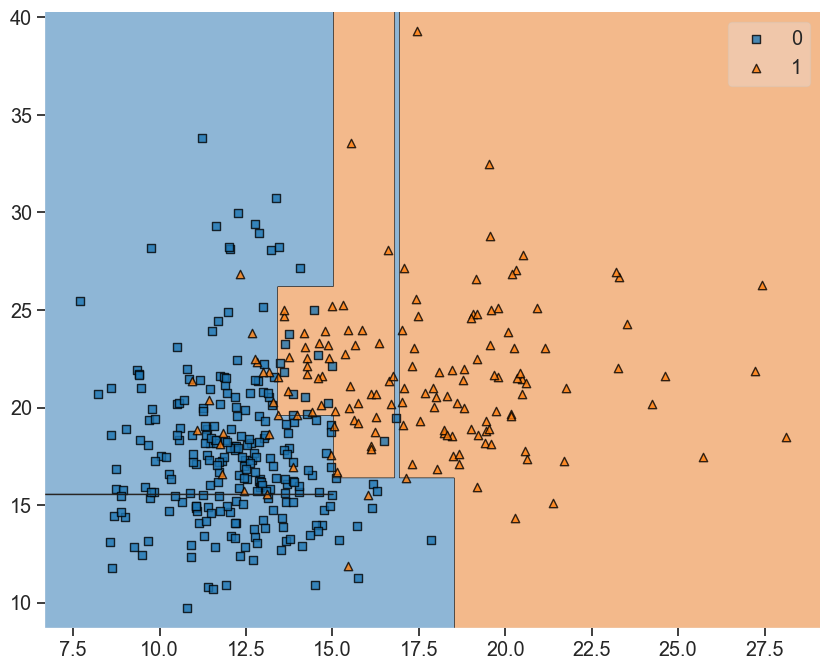

In [211]:
from mlxtend.plotting import plot_decision_regions
X_train1 = np.asarray(X_train)
y_train1 = np.asarray(y_train)
plt.figure(figsize = (10, 8))
plot_decision_regions(X_train1, y_train1, clf = decision_tree)
plt.grid()
plt.show()

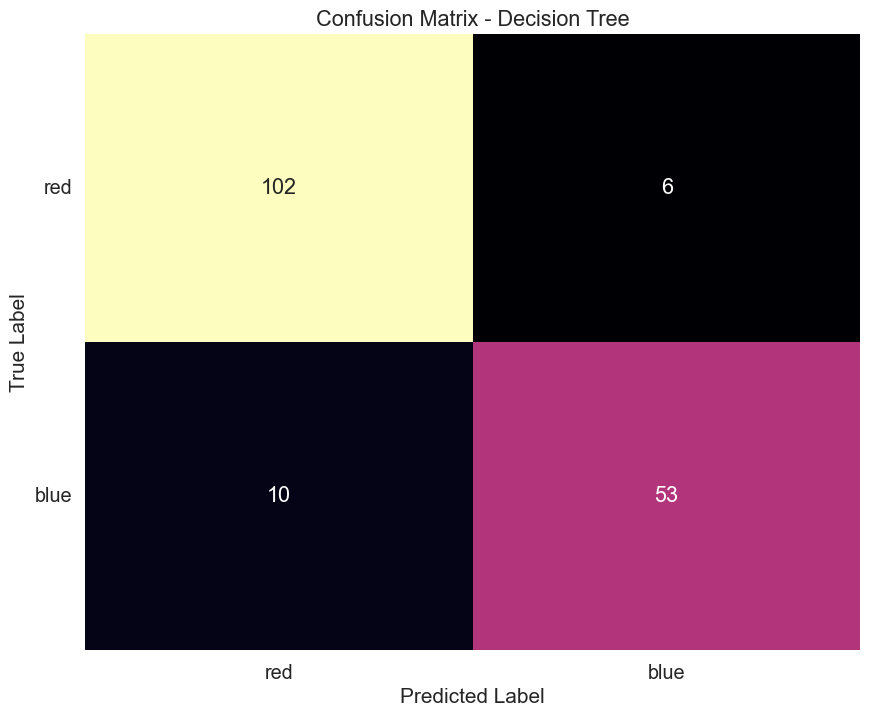

In [201]:

# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["red", "blue"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["red", "blue"], rotation=0)
plt.show()

accuracy score = 0.9064327485380117


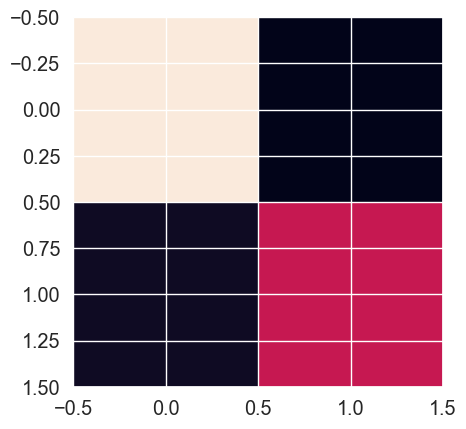

In [202]:
plt.imshow (confusion_matrix)
y_pred = decision_tree.predict (X_test)
print (f'accuracy score = { metrics.accuracy_score (y_test, y_pred)}'     )

In [203]:
print (f'precision score')
precision = metrics.precision_score (y_test,
                                     y_pred,
                                    average = None)

precision_results = pd.DataFrame (precision, index = labels)
precision_results.rename (columns= {0:'precison'}, inplace = True)
precision_results

precision score


,precison
red,0.910714
blue,0.898305


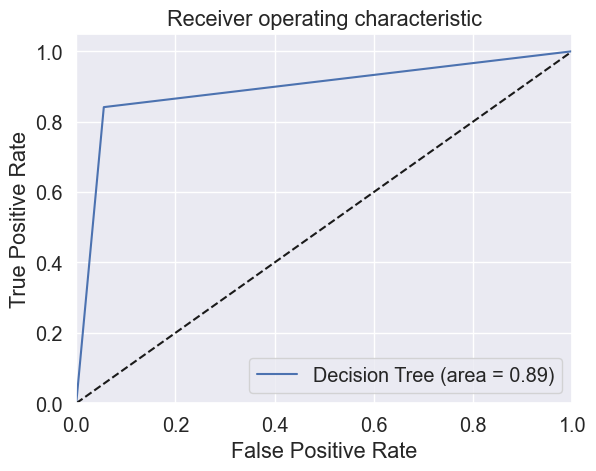

In [212]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()